Group: Noah Little, Zach Healy, Jack Stout, Jacob Thieret, Justin Kehoe, Collyn Rouggly, Momoh Brema

## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize data
df = pd.read_csv('athlete_events.csv', usecols=['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC',
                                                'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'])

## Clean Data
- Convert height to feet
- Convert weight to pounds

In [2]:
# Convert data into imperial units
df['Height'] = df['Height'] / 30.48
df['Weight'] = df['Weight'] * 2.20462

## Convert athletics to Track and Field

In [3]:
df.loc[df['Sport'] == 'Athletics', 'Sport'] = 'Track and Field'

## Overview of data

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,5.905512,176.36960,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,5.577428,132.27720,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,6.069554,180.77884,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Male and Female Weight/Height Scatterplot

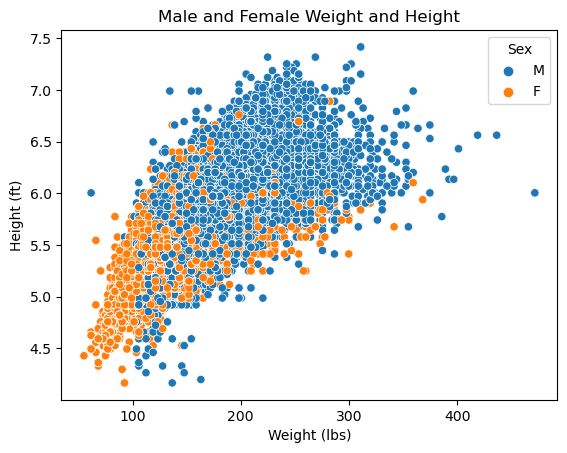

In [5]:
# Male and Female Weight and Height
sns.scatterplot(x='Weight', y='Height', hue='Sex', data=df)
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (ft)')
plt.title('Male and Female Weight and Height')
plt.show()

As we may have assumed the height and weight is in general greater for the male athletes than the female athlese

## Atheletes per Year by Sex

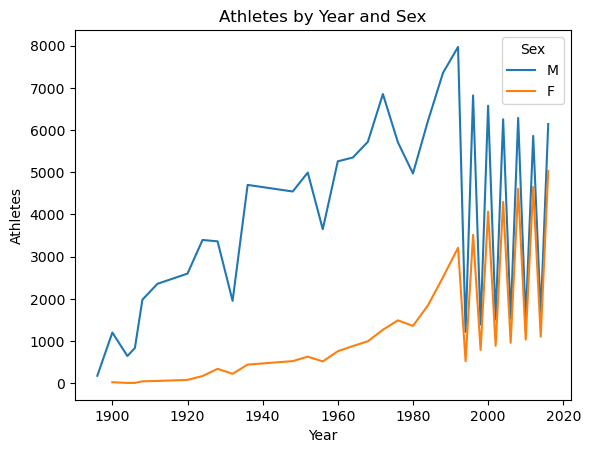

In [6]:
# Athletes by year and sex
year_sex_counts = df.groupby(['Year', 'Sex'])['ID'].nunique().reset_index()
sns.lineplot(x='Year', y='ID', hue='Sex', data=year_sex_counts)
plt.xlabel('Year')
plt.ylabel('Athletes')
plt.title('Athletes by Year and Sex')
plt.show()

We can determine that there was probably less collected data during the early 1900s, but we can see the number of male athletes was significantly higher during the 1900s. Then in the 2000s the number of female athletes increased greatly almost getting lose to the number of male athletes.

## Average number of athletes per year for each country

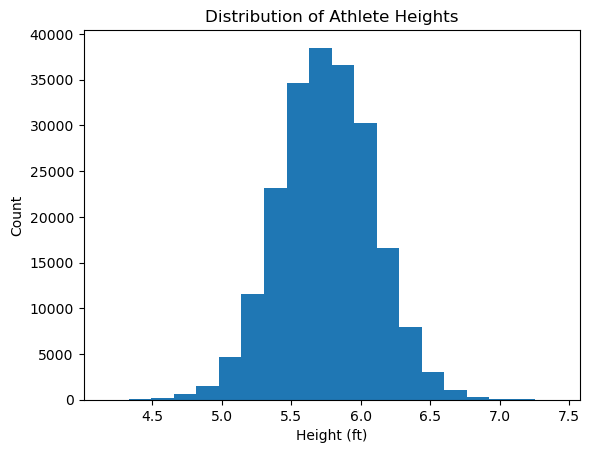

In [7]:
# Extract the Height column and convert to a NumPy array
heights = np.array(df['Height'])

# Plot a histogram of the heights
plt.hist(heights, bins=20)
plt.xlabel('Height (ft)')
plt.ylabel('Count')
plt.title('Distribution of Athlete Heights')
plt.show()

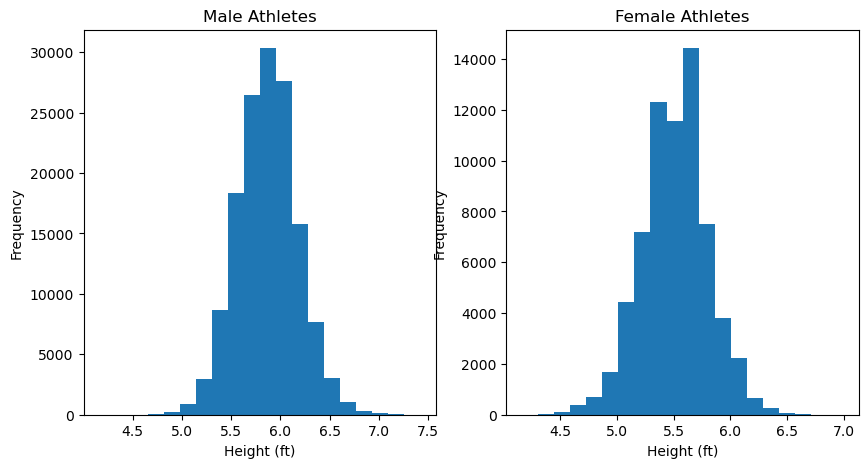

In [8]:
male_df = df[df['Sex'] == 'M']
female_df = df[df['Sex'] == 'F']

# plot histograms of height for each gender
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
ax1.hist(male_df['Height'], bins=20)
ax1.set_xlabel('Height (ft)')
ax1.set_ylabel('Frequency')
ax1.set_title('Male Athletes')
ax2.hist(female_df['Height'], bins=20)
ax2.set_xlabel('Height (ft)')
ax2.set_ylabel('Frequency')
ax2.set_title('Female Athletes')
plt.show()

In [9]:
""""
counted = df.groupby(['Team', 'Year']).size()

# calculate the average number of athletes for each team over the years
avg_num_athletes = counted.groupby([]'Team').mean().nlargest(10)

# create a bar plot using matplotlib, with the x-axis representing the teams and the y-axis representing the average number of athletes
avg_num_athletes.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average number of athletes')
plt.title('Average number of athletes per team over the years')
plt.show()
"""

'"\ncounted = df.groupby([\'Team\', \'Year\']).size()\n\n# calculate the average number of athletes for each team over the years\navg_num_athletes = counted.groupby([]\'Team\').mean().nlargest(10)\n\n# create a bar plot using matplotlib, with the x-axis representing the teams and the y-axis representing the average number of athletes\navg_num_athletes.plot(kind=\'bar\')\nplt.xlabel(\'Country\')\nplt.ylabel(\'Average number of athletes\')\nplt.title(\'Average number of athletes per team over the years\')\nplt.show()\n'

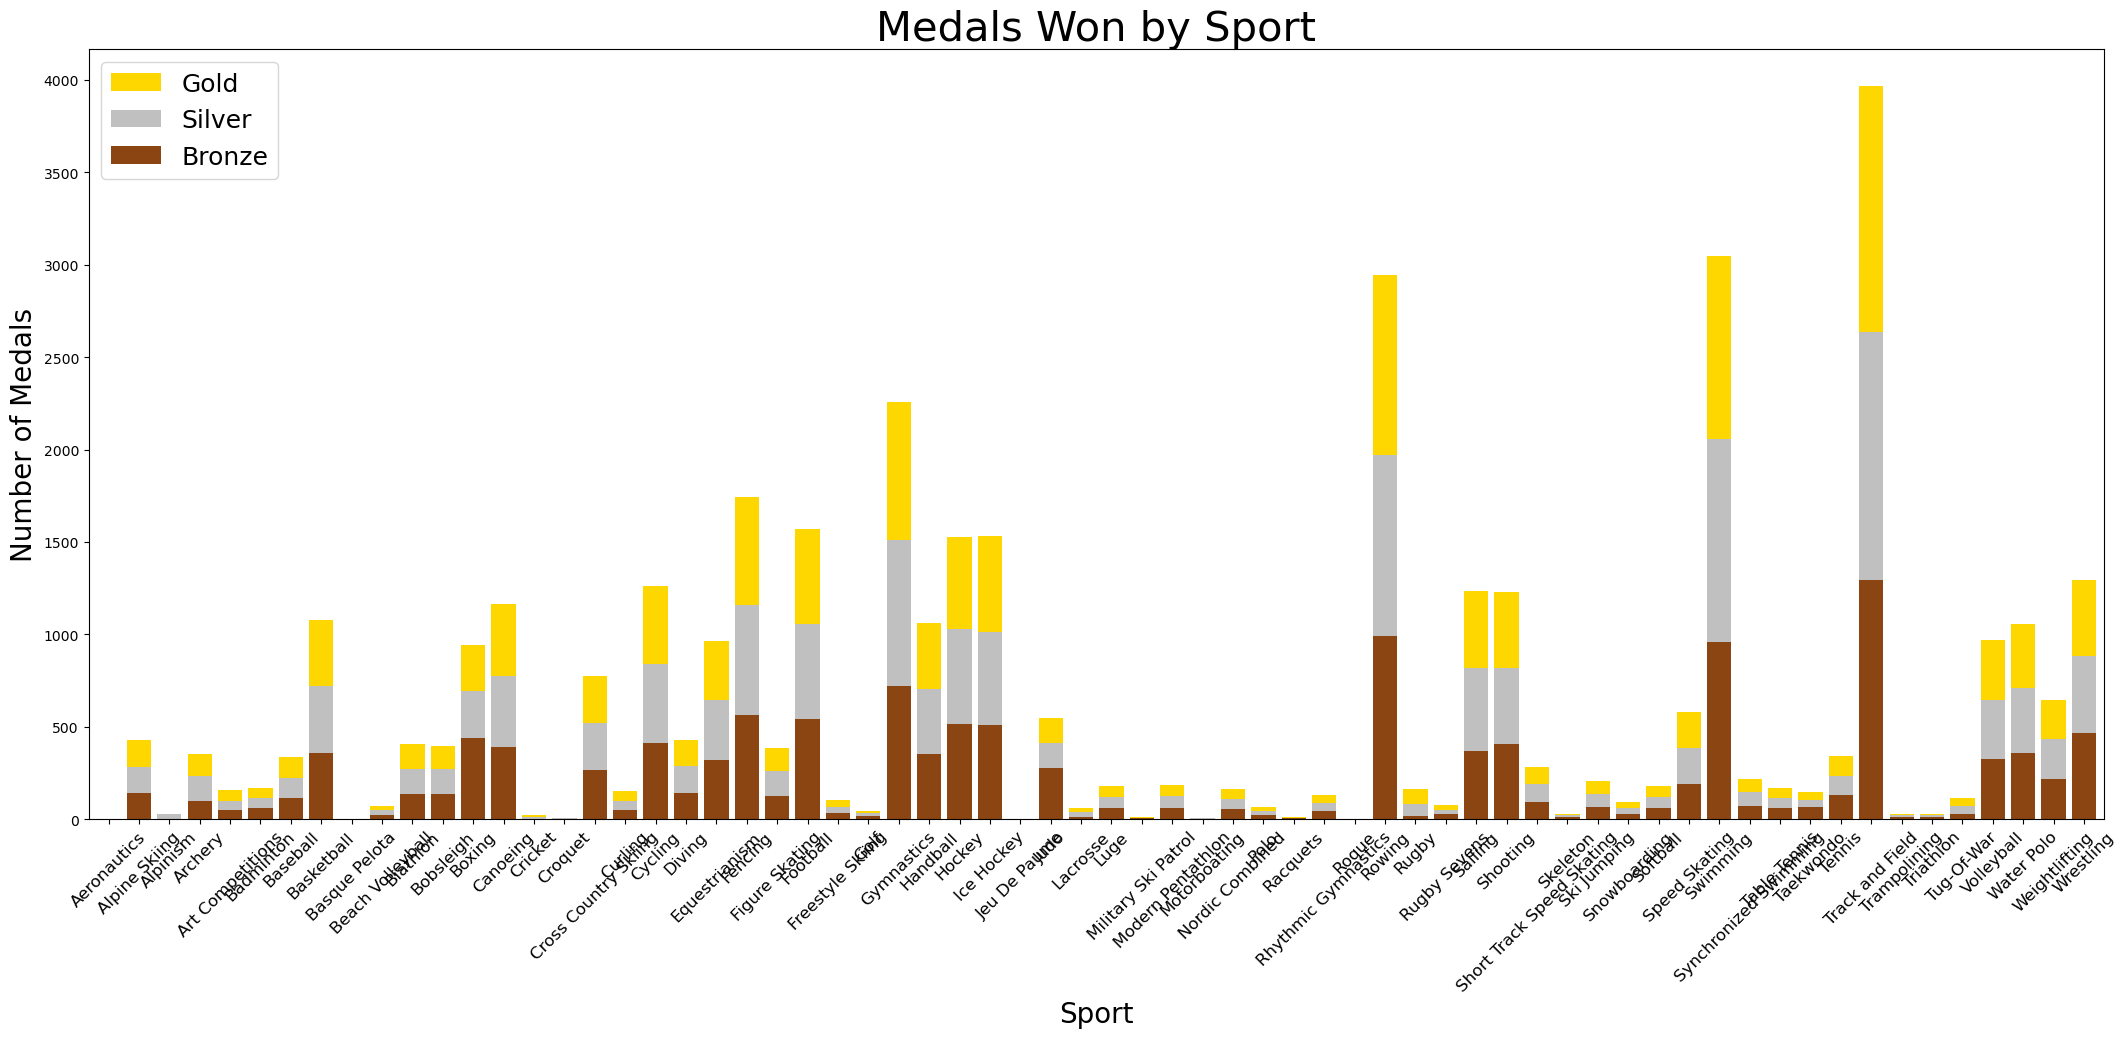

In [30]:
# Group the data by sport and medal type, then count the number of medals in each group
medal_count = df.groupby('Sport')['Medal'].value_counts().unstack().fillna(0)

# Create a stacked bar plot
ax = medal_count.plot(kind='bar', stacked=True, figsize=(26, 10), width=0.8, color=['saddlebrown', 'silver', 'gold'])

# Set the title and labels
ax.set_title('Medals Won by Sport', fontsize=30)
ax.set_xlabel('Sport', fontsize=20)
ax.set_ylabel('Number of Medals', fontsize=20)
ax.tick_params(axis='x', labelsize=12, labelrotation=45)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
labels = ['Bronze', 'Silver', 'Gold']
ax.legend(reversed(handles), reversed(labels), loc='upper left', fontsize=18)

# Show the plot
plt.show()

## Medal Counts by Country

In [ ]:
# Separate medal counts by country
gold = df[df['Medal'] == 'Gold'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Gold'})
silver = df[df['Medal'] == 'Silver'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Silver'})
bronze = df[df['Medal'] == 'Bronze'].groupby('Team')['Medal'].count().reset_index().rename(columns={'Medal': 'Bronze'})

# Merge dataframes
medals = pd.merge(bronze, silver, on='Team', how='outer')
medals = pd.merge(medals, gold, on='Team', how='outer')
medals = medals.fillna(0)
medals['Total'] = medals['Gold'] + medals['Silver'] + medals['Bronze']

# Sort medals
medals = medals.sort_values('Total', ascending=False).head(20)

# Create bar plot
plt.figure(figsize=(15, 10))
plt.barh(medals['Team'], medals['Bronze'], color='peru', label='Bronze')
plt.barh(medals['Team'], medals['Silver'], left=medals['Bronze'], color='silver', label='Silver')
plt.barh(medals['Team'], medals['Gold'], left=medals['Bronze'] + medals['Silver'], color='gold', label='Gold')
plt.xlabel('Number of Medals')
plt.title('Number of Medals Won by Country')
plt.legend()
plt.show()


C:\Users\colly\AppData\Local\Temp\ipykernel_31720\1185534966.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(country_data['Sport'], rotation=45, ha='right', fontsize=10)


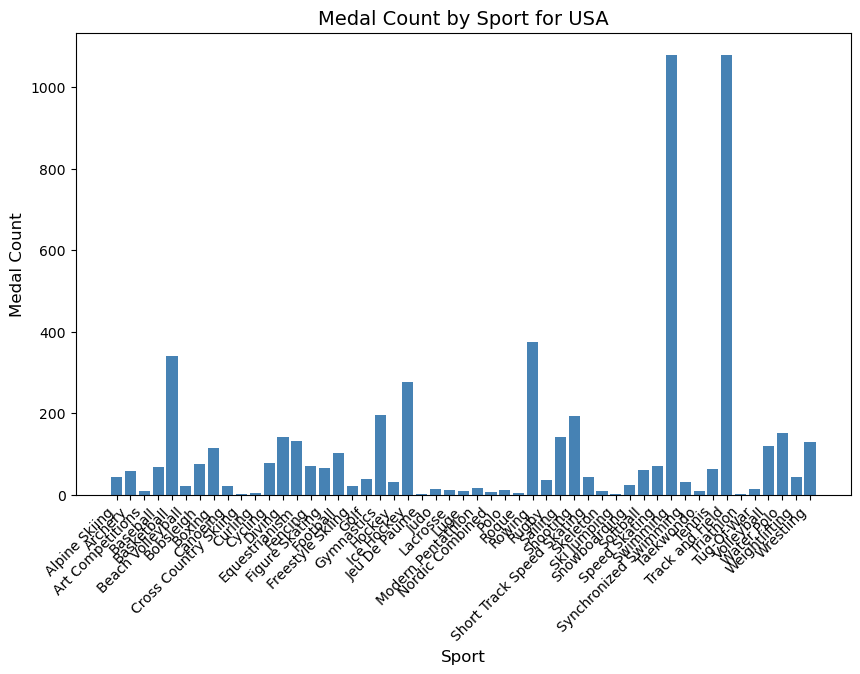

C:\Users\colly\AppData\Local\Temp\ipykernel_31720\1185534966.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(country_data['Sport'], rotation=45, ha='right', fontsize=10)


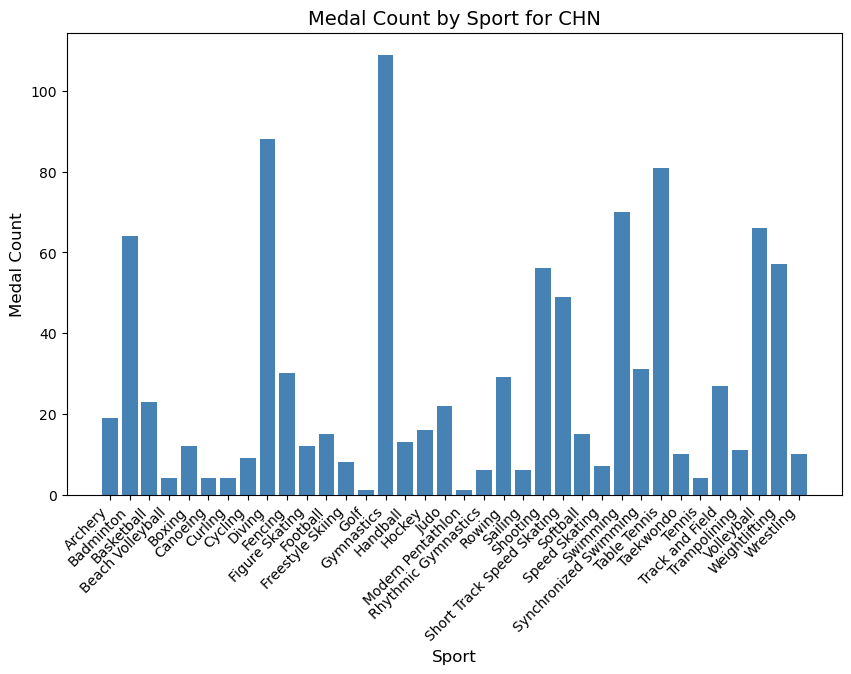

C:\Users\colly\AppData\Local\Temp\ipykernel_31720\1185534966.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(country_data['Sport'], rotation=45, ha='right', fontsize=10)


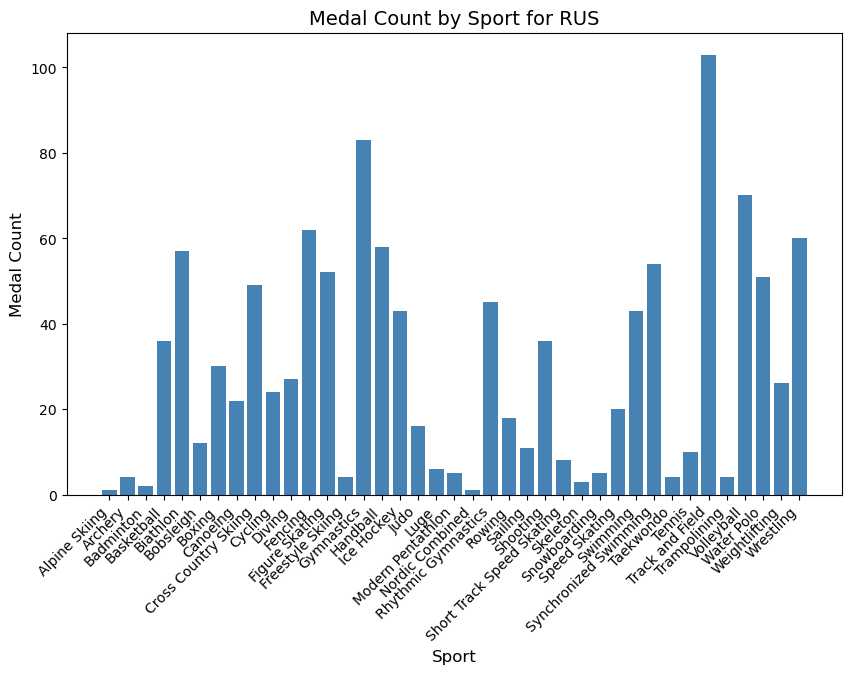

C:\Users\colly\AppData\Local\Temp\ipykernel_31720\1185534966.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(country_data['Sport'], rotation=45, ha='right', fontsize=10)


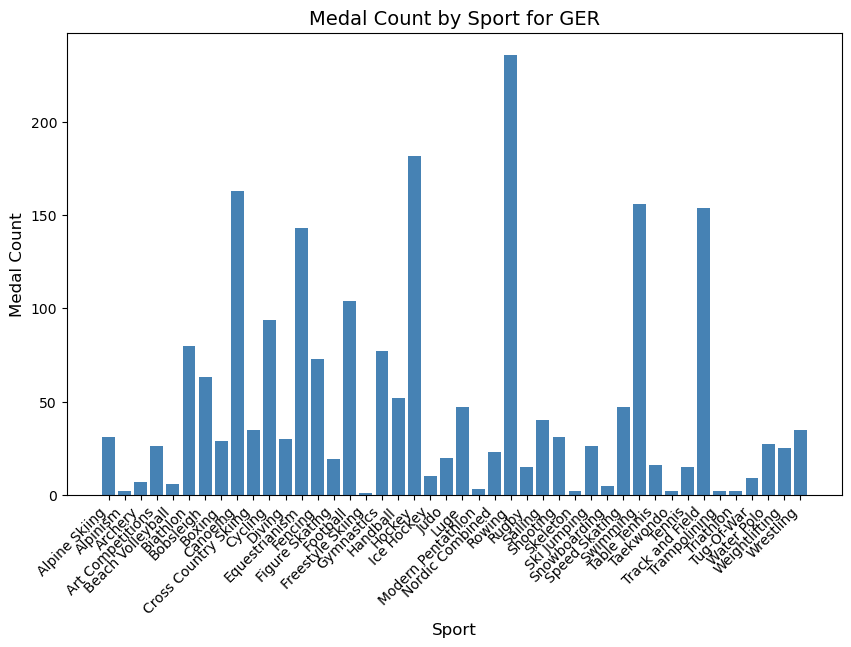

C:\Users\colly\AppData\Local\Temp\ipykernel_31720\1185534966.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(country_data['Sport'], rotation=45, ha='right', fontsize=10)


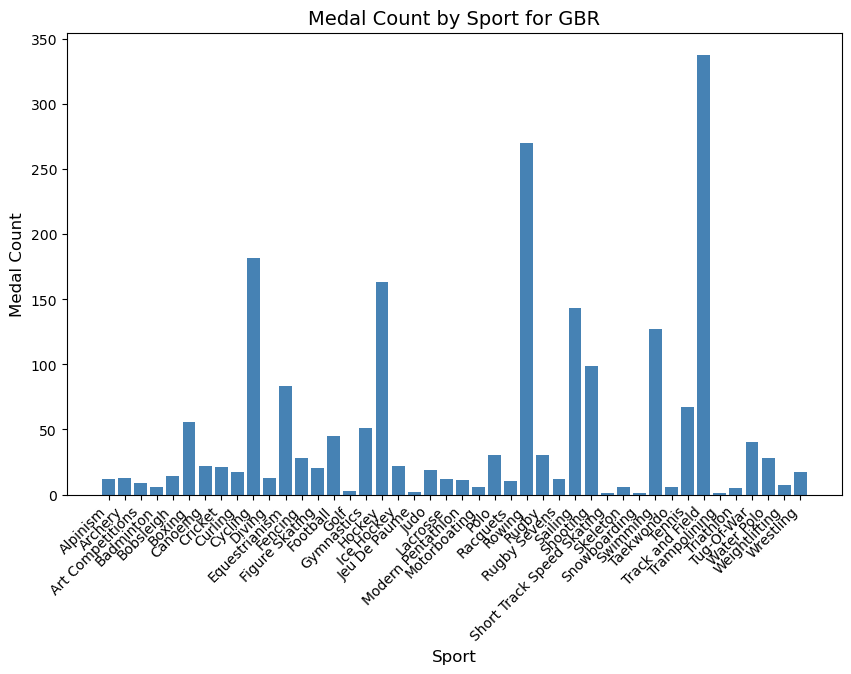

In [33]:
medal_winners = df[df['Medal'].notnull()]

# Group by country and sport
medals_by_country_sport = medal_winners.groupby(['NOC', 'Sport']).size().reset_index(name='Medal Count')

# Choose a few countries to plot
countries = ['USA', 'CHN', 'RUS', 'GER', 'GBR']

# Loop over the chosen countries and plot the medal count by sport
for country in countries:
    # Filter to the current country
    country_data = medals_by_country_sport[medals_by_country_sport['NOC'] == country]

    # Create the bar plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(country_data['Sport'], country_data['Medal Count'], color='steelblue')

    # Customize the plot
    ax.set_title(f'Medal Count by Sport for {country}', fontsize=14)
    ax.set_xlabel('Sport', fontsize=12)
    ax.set_ylabel('Medal Count', fontsize=12)
    ax.set_xticklabels(country_data['Sport'], rotation=45, ha='right', fontsize=10)

    # Show the plot
    plt.show()

## Country Medals by Decade Heatmap

In [ ]:
bins = np.arange(1890, 2021, 10)
medals_by_country_decade = df.groupby(['Team', pd.cut(df['Year'], bins=bins)])['Medal'].count().reset_index().pivot(index='Team', columns='Year', values='Medal')
medals = df.groupby('Team')['Medal'].count().reset_index().sort_values('Medal', ascending=False).head(20)

medals_by_country_decade = medals_by_country_decade.loc[medals['Team'], :]

# Create heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(medals_by_country_decade, cmap='YlGnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.xlabel('Decade')
plt.ylabel('Country')
plt.title('Country Medals by Decade')
plt.show()


In [ ]:
gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()
df = df.dropna(subset=['Height'])

max_male_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'M', 'Height'].max()
max_female_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'F', 'Height'].max()
sport_with_tallest_avg_male = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'M') & (gb_sport_sex['Height'] == max_male_height), 'Sport'].iloc[0]
sport_with_tallest_avg_female = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'F') & (gb_sport_sex['Height'] == max_female_height), 'Sport'].iloc[0]
print(f"The sport with the tallest average males is {sport_with_tallest_avg_male}, with an average height of {max_male_height:.1f} ft")
print(f"The sport with the tallest average females is {sport_with_tallest_avg_female}, with an average height of {max_female_height:.1f} ft")

sports = gb_sport_sex['Sport'].unique()
#print(sports)

for sport in sports:
    sport_df = gb_sport_sex[gb_sport_sex['Sport'] == sport]
    male_heights = sport_df[sport_df['Sex'] == 'M']['Height']
    female_heights = sport_df[sport_df['Sex'] == 'F']['Height']
    fig, ax = plt.subplots()
    ax.bar('Male', male_heights, label='Male')
    ax.bar('Female', female_heights, label='Female')
    ax.set_title(sport)
    ax.set_xlabel('Gender')
    ax.set_ylabel('Average Height')
    ax.legend()
    ax.set_ylim([0, gb_sport_sex['Height'].max()+0.1])
    ax.set_yticks(np.arange(0, gb_sport_sex['Height'].max()+0.1, .2))
    #plt.show()

In [ ]:
import textwrap

df = df.dropna(subset=['Height'])
gb_sport_sex = df.groupby(['Sport', 'Sex']).mean(numeric_only=False).reset_index()

max_male_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'M', 'Height'].max()
max_female_height = gb_sport_sex.loc[gb_sport_sex['Sex'] == 'F', 'Height'].max()
sport_with_tallest_avg_male = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'M') & (gb_sport_sex['Height'] == max_male_height), 'Sport'].iloc[0]
sport_with_tallest_avg_female = gb_sport_sex.loc[(gb_sport_sex['Sex'] == 'F') & (gb_sport_sex['Height'] == max_female_height), 'Sport'].iloc[0]
print(f"The sport with the tallest average males is {sport_with_tallest_avg_male}, with an average height of {max_male_height:.1f} ft")
print(f"The sport with the tallest average females is {sport_with_tallest_avg_female}, with an average height of {max_female_height:.1f} ft")

max_height_sport_sex = df.groupby(['Sport', 'Sex'])['Height'].max().reset_index()

# Filter out sports with both genders
filtered_sports = [sport for sport in max_height_sport_sex['Sport'].unique() if all(gender in max_height_sport_sex[max_height_sport_sex['Sport'] == sport]['Sex'].values for gender in ['M', 'F'])]

custom_palette = {'M': 'teal', 'F': 'lightcoral'}

# Plot Average Height
plt.figure(figsize=(30, 10))
sns.pointplot(data=gb_sport_sex[gb_sport_sex['Sport'].isin(filtered_sports)], x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette)

# Customize the plot
plt.title('Average Height by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Average Height')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in filtered_sports]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.show()

# Plot Max Height
plt.figure(figsize=(30, 10))
sns.pointplot(data=max_height_sport_sex[max_height_sport_sex['Sport'].isin(filtered_sports)], x='Sport', y='Height', hue='Sex', dodge=True, palette=custom_palette)

# Customize the plot
plt.title('Max Height by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Max Height')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in filtered_sports]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.show()


In [ ]:
# Drop rows with missing weight data
df = df.dropna(subset=['Weight'])

# Group the data by sport and gender, and calculate the mean and max weight
gb_sport_sex = df.groupby(['Sport', 'Sex']).agg({'Weight': ['mean', 'max']}).reset_index()
gb_sport_sex.columns = ['Sport', 'Sex', 'Avg_Weight', 'Max_Weight']

# Filter out sports with both genders
sports_with_both_genders = gb_sport_sex.groupby('Sport').filter(lambda x: len(x) == 2)['Sport'].unique()
gb_sport_sex = gb_sport_sex[gb_sport_sex['Sport'].isin(sports_with_both_genders)]

# Create a pivoted DataFrame for plotting
pivoted = gb_sport_sex.pivot(index='Sport', columns='Sex', values=['Avg_Weight', 'Max_Weight']).reset_index()
pivoted.columns = ['Sport', 'Avg_Weight_F', 'Avg_Weight_M', 'Max_Weight_F', 'Max_Weight_M']

# Set the sorted sports order
sorted_sports = gb_sport_sex.sort_values(['Sex', 'Max_Weight'], ascending=[False, False])['Sport'].unique()
pivoted['Sport'] = pd.Categorical(pivoted['Sport'], categories=sorted_sports, ordered=True)
pivoted = pivoted.sort_values('Sport')

# Create the custom palette
custom_palette = {'M': 'teal', 'F': 'lightcoral'}

# Plot the average weight by sport and gender
plt.figure(figsize=(30, 10))
sns.pointplot(data=pivoted, x='Sport', y='Avg_Weight_M', color='teal', label='Male')
sns.pointplot(data=pivoted, x='Sport', y='Avg_Weight_F', color='lightcoral', label='Female')

# Customize the plot
plt.title('Average Weight by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Average Weight (lbs)')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in sorted_sports]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.show()

# Plot the maximum weight by sport and gender
plt.figure(figsize=(30, 10))
sns.pointplot(data=pivoted, x='Sport', y='Max_Weight_M', color='teal', label='Male')
sns.pointplot(data=pivoted, x='Sport', y='Max_Weight_F', color='lightcoral', label='Female')

# Customize the plot
plt.title('Maximum Weight by Gender for Each Sport', fontsize=45)
plt.xlabel('Sport')
plt.ylabel('Maximum Weight (lbs)')
plt.xticks(rotation=45)
wrapped_sports = [' '.join(textwrap.wrap(sport, 10)) for sport in sorted_sports]
plt.gca().set_xticklabels(wrapped_sports, ha='right')
plt.legend(title='Gender')